# 2）Exploratory Data Analysis and Visualization 



*   Word Cloud☁️



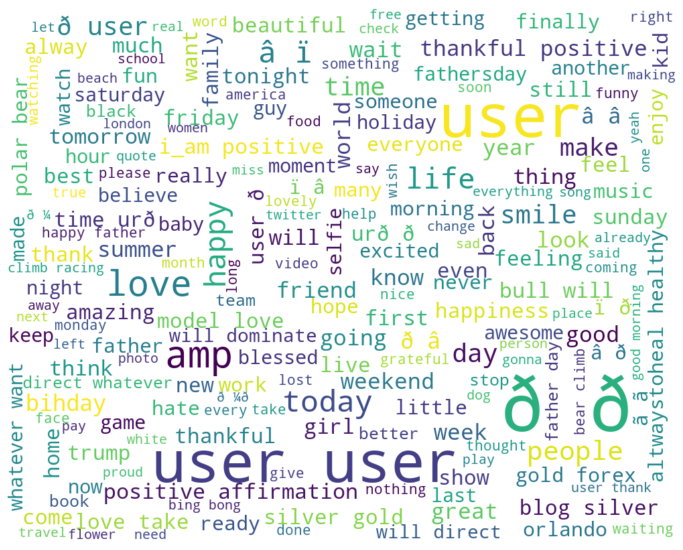

In [151]:
#https://www.datacamp.com/tutorial/wordcloud-python
#understand the common words appear in tweets with wordcloud
words = ' '.join([text for text in data['tidy_tweet']])
# Create and generate a wordcloud image:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110,background_color='white').generate(words)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In breif summary, the words are mostly postive or netrual.

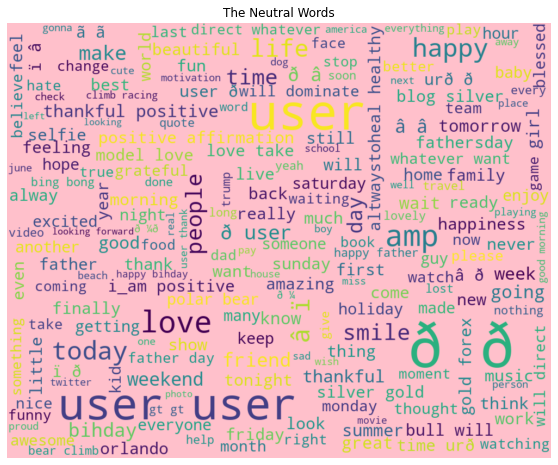

In [152]:
#draw positive and netrual wordcloud
nonhate_words = ' '.join([text for text in data['tidy_tweet'][data['label'] == 0]])
# Create and generate a wordcloud image:
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110,background_color='pink').generate(nonhate_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('The Neutral Words')
plt.axis('off')
plt.show()

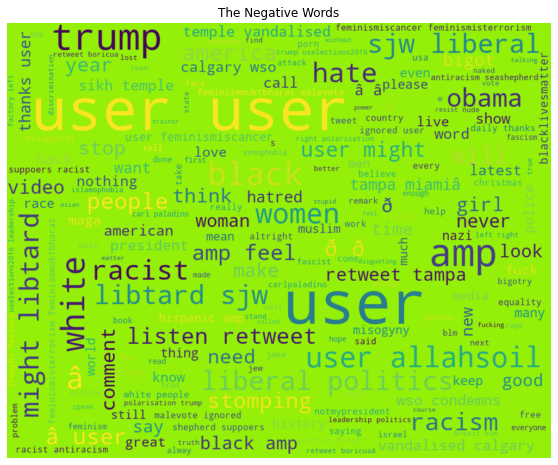

In [153]:
#draw negative wordcloud
nonhate_words = ' '.join([text for text in data['tidy_tweet'][data['label'] == 1]])
# Create and generate a wordcloud image:
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110,background_color='#94F008').generate(nonhate_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('The Negative Words')
plt.axis('off')
plt.show()

- Word Frequency📊

In [154]:
#Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time.
#set up a function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:        # Loop over the words in the tweet
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [155]:
#store all the ongoing trends into two different lists:
#1)Racial/Sexual
ht_negative = hashtag_extract(data['tidy_tweet'][data['label'] == 1])
#2)Non-Racial/Non-Sexual
ht_positive = hashtag_extract(data['tidy_tweet'][data['label'] == 0])

#prepare lists of hashtags for both the sentiments--the unnesting lists
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

  - Postive Tweets

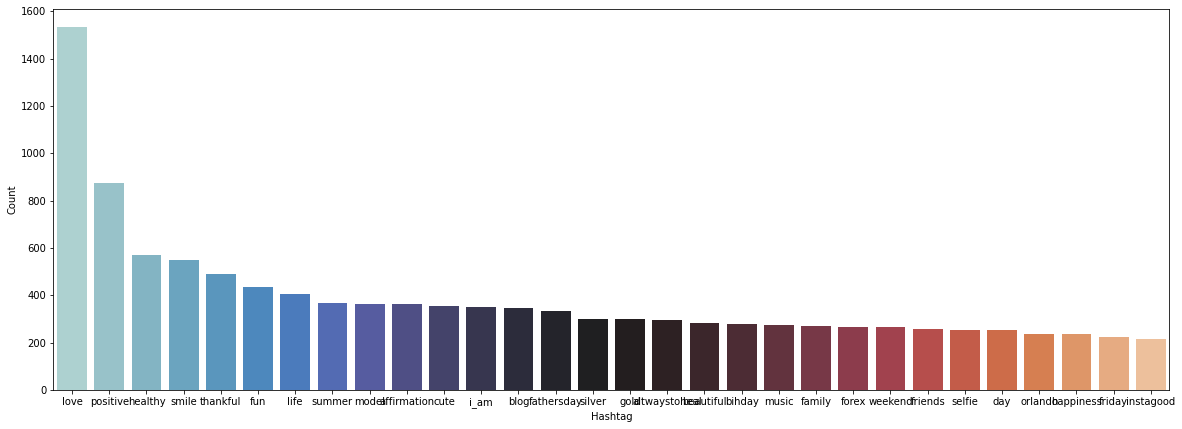

In [156]:
#get the words distributions
a = nltk.FreqDist(ht_positive)
#establish a dataframe for words counts
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 30 most frequent appearance hashtags     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(20,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette="icefire")
ax.set(ylabel = 'Count')
plt.show()

- Negative Tweets

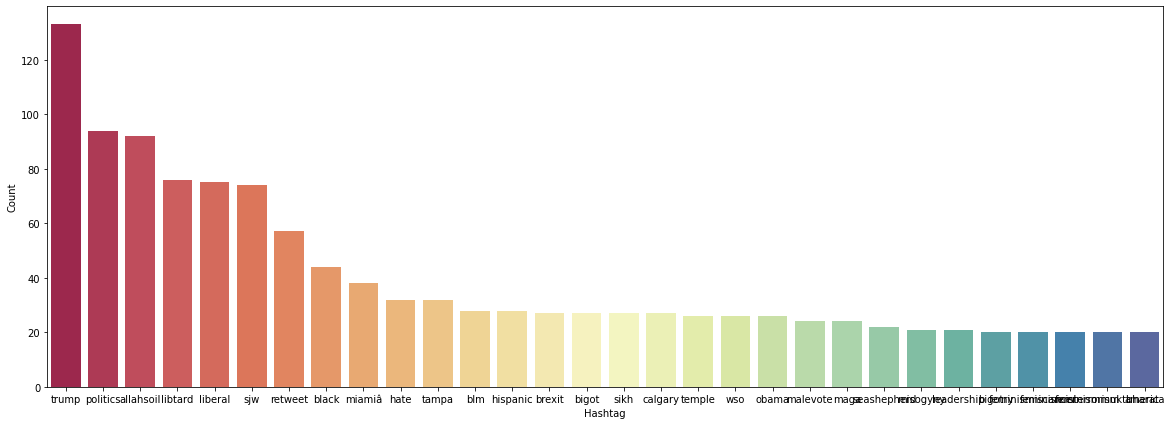

In [157]:
#get the words distributions
b = nltk.FreqDist(ht_negative)
#establish a dataframe for words counts
e = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 30 most frequent appearance hashtags     
e = e.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(20,7))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count",palette="Spectral")
ax.set(ylabel = 'Count')
plt.show()

# 3)Feature Engineering 
- Bag of Words
- TF-IDF
- Word Embedding🧸

# - Bag of Words
-  Convert text into numerical features
- Build a classification model
- Can be easily created by ***CountVectorized()*** function in sklearn package
- occurrence (denoted by 1 or 0) or even weighted values. 

In [158]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

BOW_vectorizer = CountVectorizer(max_df=0.90,  #ignore terms that appear in more than 90% of the documents
                                 min_df=2,     #ignore terms that appear in less than 2 documents
                                 max_features=1000,   #select only top 1000 terms ordered by term frequency across the corpus.
                                 stop_words='english')
BOW = BOW_vectorizer.fit_transform(data['tidy_tweet'])
BOW.shape

(49159, 1000)

# -TF-IDF Features


- TF:the number of times a word appears in a document divided by the total number of words in that document,measuring **how frequently a term occurs in a document**.
- IDF:the number of the documents in the corpus divided by the number of documents where the specific term appears, measuring **the significance of a word**.

In [159]:
TFIDF_vectorizer = TfidfVectorizer(max_df=0.90,
                                   min_df=2, 
                                   max_features=1000, 
                                   stop_words='english')
TFIDF =TFIDF_vectorizer.fit_transform(data['tidy_tweet'])
TFIDF.shape

(49159, 1000)

# - Word Embedding
- 🌟Important Website for Gensim Tutorial: **Word2Vec|Doc2Vec|LDA|FastText|BOG**: https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py

# 🧸 Word2Vec
- Created using Continuous *Bag-of-Words model (CBOW)* and the *Skip-Gram* model.
  - CBOW: creates a sliding window around current word. Each word is represented as a feature vector, the content predicted is decided by other words around it, as a result, **predicting one word** each time.
  - Skip-Gram: Use one word to **predict all surrounding words** (“context”). It is slower than above method, and more accurate.
  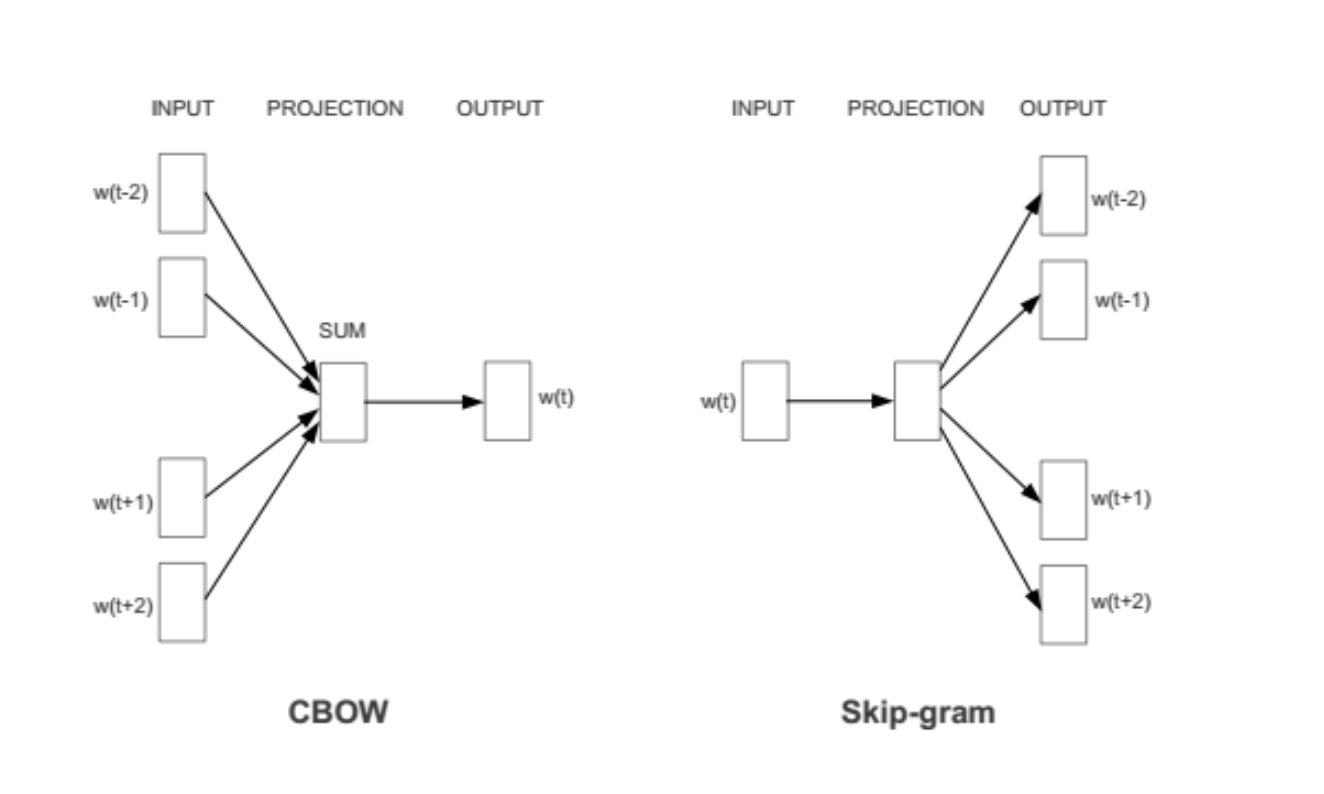

In [160]:
#Tokenization
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split()) 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired number of independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1,    # 1 for skip-gram model(by default sg=0)
            hs = 0,
            negative = 10,  # negative sampling
            workers= 2,  # number of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['tidy_tweet']), epochs=20)

(6769763, 8723400)

In [161]:
#take one word as an example
model_w2v.wv.most_similar(positive='smile')

[('#invisalignjourney', 0.6516119837760925),
 ("saira's", 0.6491944789886475),
 ('â\x98ºâ\x9d¤', 0.5935653448104858),
 ('Â©Â®i$tiâ\x82¬', 0.5885738134384155),
 ('soul#fake', 0.5825372934341431),
 ('#dog.', 0.5804139971733093),
 ('#thinking#sweet', 0.579561710357666),
 ('grin.', 0.5795463919639587),
 ('smiles', 0.5769239664077759),
 ('#orchidsofinstagramâ\x80¦', 0.5736614465713501)]

In [162]:
model_w2v.wv.most_similar(positive="political")

[('#ericfriday', 0.7007825970649719),
 ('gain.', 0.69915372133255),
 ('#humanlife', 0.6682894229888916),
 ('zoological', 0.6680618524551392),
 ('correctness', 0.6562832593917847),
 ('disaster,', 0.6458768248558044),
 ('depicts', 0.6312774419784546),
 ('beliefs.', 0.630099892616272),
 ('member.', 0.6221623420715332),
 ('development,', 0.6214515566825867)]

In [163]:
model_w2v['blog']

array([ 0.25939298, -0.04772756, -0.13138029, -0.93653023, -0.15757982,
       -0.54992306, -0.3297096 ,  0.5008663 , -0.23271838, -0.8228333 ,
        0.01662675,  0.3108017 , -0.88297623,  0.449686  ,  0.42592195,
        0.01813722,  0.10219012, -0.18240981, -0.06694987, -0.20372117,
       -0.13323398,  0.30428335, -0.6913677 , -0.24032724, -0.45497897,
       -0.5169901 ,  0.12361308,  0.13724127, -0.16830055, -0.31120875,
       -0.19431034, -0.3204206 , -0.20979078,  0.24557434,  0.33786625,
       -0.1456925 ,  0.1458817 , -0.10835605,  0.1276389 ,  0.01985935,
       -0.1614933 ,  0.26655385,  0.04987475, -0.33666432, -0.6247868 ,
        0.48119617,  0.07271791,  0.2860919 , -0.28912246, -0.33776715,
       -0.22575422, -0.0804797 ,  0.15474811, -0.93200207,  0.36414024,
       -0.16074328, -0.17897363, -0.13735864,  0.06485638, -0.4236858 ,
       -0.09217878,  0.18010159,  0.55536264,  0.0191928 , -0.005234  ,
       -0.02799571, -0.4776842 ,  0.04907135,  0.44800365, -0.47

In [164]:
len(model_w2v['blog'])

200

In [165]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))  #+=: Adds a value and the variable and assigns the result to that variable.
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

# 🧸Doc2Vec
- Goal: Predict a numeric representation of a document.
- **PV-DM (Distributed Memory Verison of Paragraph Vector)**: A word vector W is generated for each word, and a document vector D is generated for each document. 
  - DM:the paragraph vector use NN to infer a center word based on content words and context graph.
  - Use softmax to train layer
- **PV-Distributed Bag of Words(PV-DBOW)**: predicting a probability distribution of words in a paragraph
-More documents, more simiarly of your documents, better.


In [166]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils

In [167]:
#set the label
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet)

In [168]:
#build the doc2vec model
model_d2v = gensim.models.Doc2Vec(dm=1,                                         #‘distributed memory’ model 
                                  dm_mean=1,                                    #using mean of the context word vectors
                                  size=200,                                     # number of desired features
                                  window=5,                                     # width of the context window
                                  negative=7,                                   #if > 0 then negative sampling will be used
                                  min_count=5,                                  #Ignores all words with total frequency <5.
                                  workers=3,                                    # number of cores
                                  alpha=0.1,                                    #set the learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 1919329.32it/s]


In [170]:
model_d2v.train(labeled_tweets, total_examples= len(data['tidy_tweet']), epochs=15)